In [1]:
# Start from importing necessary packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### K-means 단점1: Need to choose a right number of clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


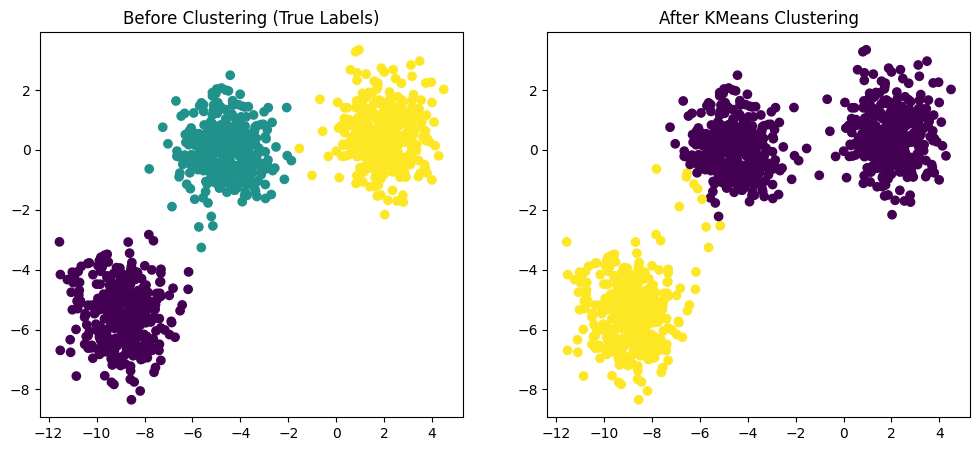

In [2]:
# Generate data.
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  random_state=170)



# Run k-means on non-spherical data.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)


# Plot origin and after clustering(centers=2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("Before Clustering (True Labels)")


axes[1].scatter(X[:, 0], X[:, 1], c=y_pred)
axes[1].set_title("After KMeans Clustering")

plt.show()

In [3]:
silhouette_scores = []
k_values = range(2, 10) 

In [4]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=170)
    labels = kmeans.fit_predict(X)
    score = metrics.silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette_score={score:.3f}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, silhouette_score=0.620
k=3, silhouette_score=0.733


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, silhouette_score=0.589


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, silhouette_score=0.449


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, silhouette_score=0.318
k=7, silhouette_score=0.327


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, silhouette_score=0.335


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, silhouette_score=0.340


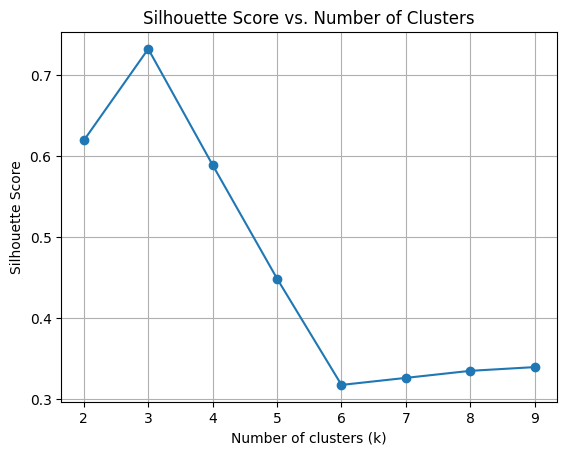

In [5]:
# 결과 시각화
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

In [6]:
k_values[np.argmax(silhouette_scores)]

3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


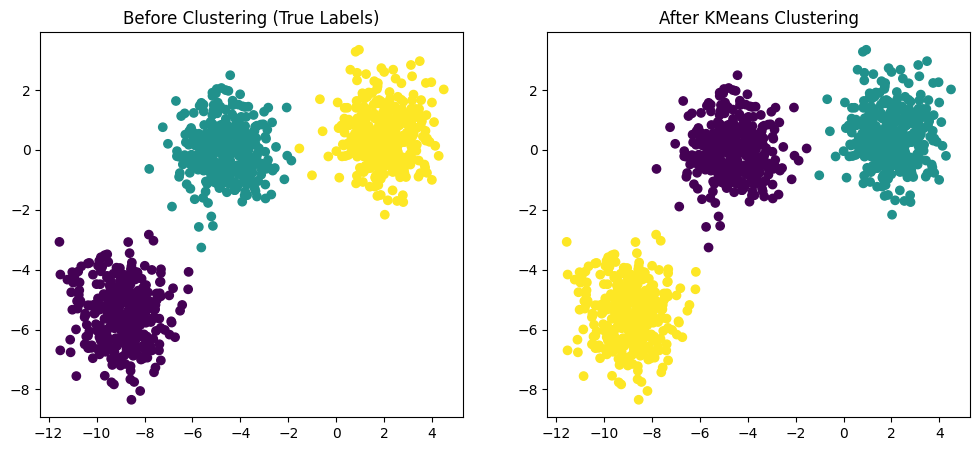

In [7]:
# Run k-means on non-spherical data.
n_cluster = k_values[np.argmax(silhouette_scores)]
y_pred = KMeans(n_clusters=n_cluster, random_state=170).fit_predict(X)


# Plot origin and after clustering(centers=2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("Before Clustering (True Labels)")


axes[1].scatter(X[:, 0], X[:, 1], c=y_pred)
axes[1].set_title("After KMeans Clustering")

plt.show()

### K-means 단점2: Cannot handle non-spherical data

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


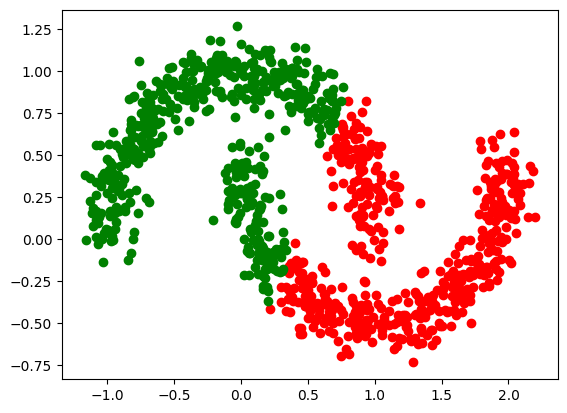

In [8]:
from sklearn.datasets import make_moons

# 1. 반달 모양 데이터 생성
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

# 2. KMeans 클러스터링
kmeans = KMeans(n_clusters=2, random_state=170)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c='red', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c='green', label='Cluster 1')

plt.show()

## DBSCAN

In [9]:
# 1. DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.13, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

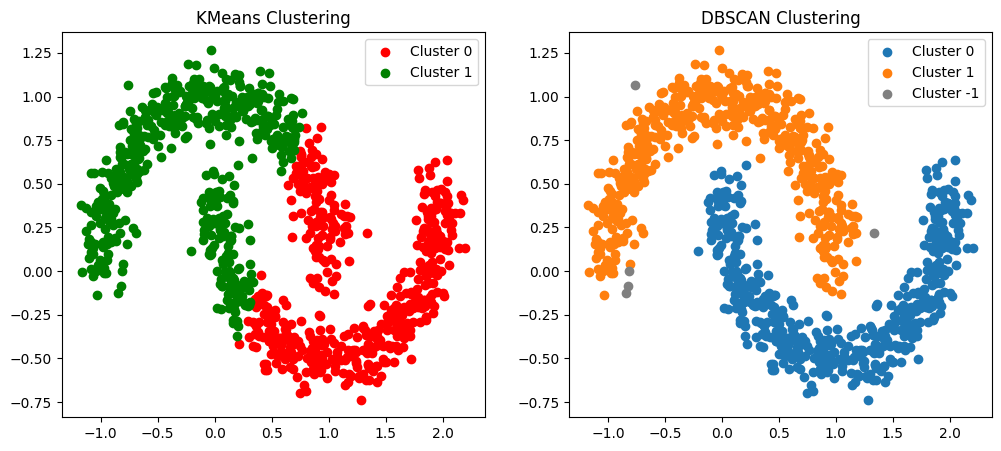

In [10]:
# 2. 시각화 (KMeans vs DBSCAN)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KMeans 결과
axes[0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c='red', label='Cluster 0')
axes[0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c='green', label='Cluster 1')
axes[0].set_title('KMeans Clustering')
axes[0].legend()

# DBSCAN 결과
for label in set(y_dbscan):
    color = 'gray' if label == -1 else None
    axes[1].scatter(X[y_dbscan == label, 0], X[y_dbscan == label, 1], label=f'Cluster {label}', c=color)
axes[1].set_title('DBSCAN Clustering')
axes[1].legend()

plt.show()

In [11]:
# 4. Silhouette Score 비교
score_kmeans = metrics.silhouette_score(X, y_kmeans)

# -1 (노이즈 제외)
mask = y_dbscan != -1
score_dbscan = metrics.silhouette_score(X[mask], y_dbscan[mask])

print(f"Silhouette Score (KMeans): {score_kmeans:.4f}")
print(f"Silhouette Score (DBSCAN): {score_dbscan}")

Silhouette Score (KMeans): 0.4841
Silhouette Score (DBSCAN): 0.33065530959697365


## DBSCAN단점: eps 민감

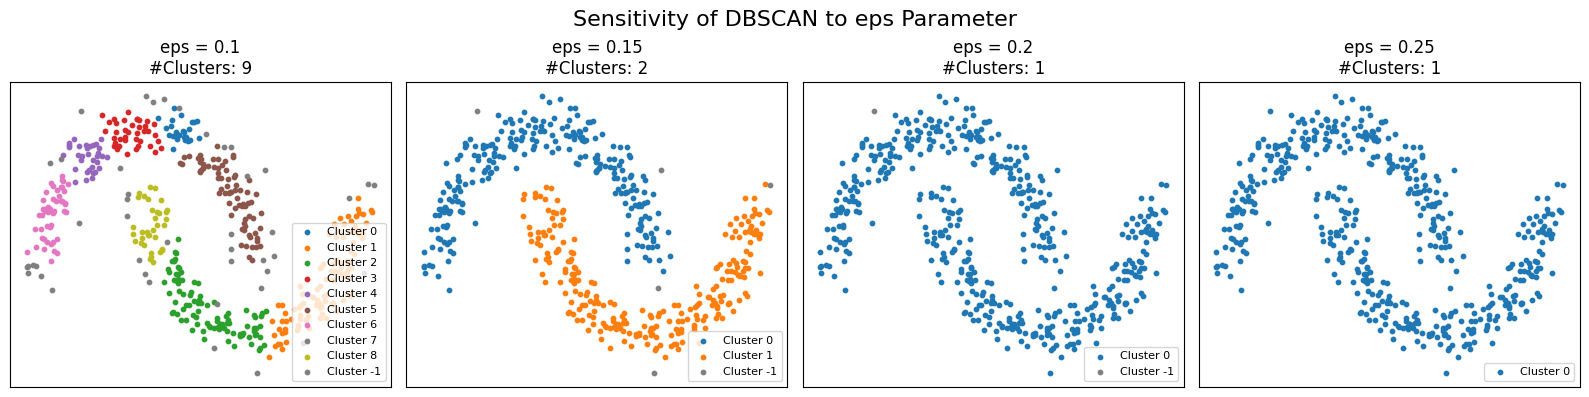

In [12]:
# 데이터 생성
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)

# 실험할 eps 값들
eps_values = [0.1, 0.15, 0.2, 0.25]

# 시각화
fig, axes = plt.subplots(1, len(eps_values), figsize=(16, 4))
fig.suptitle("Sensitivity of DBSCAN to eps Parameter", fontsize=16)

for ax, eps in zip(axes, eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)

    for label in set(labels):
        mask = labels == label
        color = 'gray' if label == -1 else None
        ax.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}', c=color, s=10)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    ax.set_title(f'eps = {eps}\n#Clusters: {n_clusters}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc='lower right', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()